# TP 1 Mesures de performance
Dans ce TP, nous aimerions avoir un premier apperçu sur les algorithmes d'apprentissage automatique. Plus précisément, nous aimerions évaluer leurs performances en utilisant les métriques suivantes:
- Matrice de conusion
- Rappel
- Précision
- Taux de FP
- Spécificité
- Courbe ROC

Les mesures devront être calculées sur la tâche de classification de nombres manuscrits.

Le travail consiste à implementer ces métriques et à les comparer avec les métriques des librairies disponibles.

Les algorithmes : K plus Proches Voisins devront être implementés.

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from numpy import random
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

# Importation des librairies necessaires au travail

In [2]:
# Pour RNC
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

# Lecture des fichiers de données à classifier
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [3]:
# données
X = np.genfromtxt('data.csv', delimiter=',', dtype=int)
X.shape 

(5000, 400)

In [4]:
# étiquettes
Y = np.genfromtxt('labels.csv', delimiter=',', dtype=int)
Y.shape
Y.reshape(5000,1)

array([[0],
       [0],
       [0],
       ...,
       [9],
       [9],
       [9]])

Afficher aléatoirement quelques données de notre base

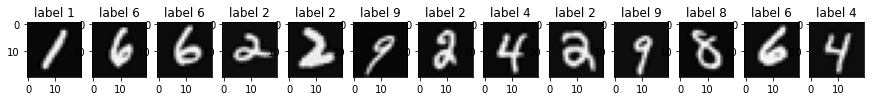

In [5]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c,:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(Y[c]))
    plt.imshow(a,cmap='gray')

Notons que l'étiquette 10 concerne le chiffre 0. L'étiquette a été utilisée ainsi afin de faciliter les calculs conséquents.

# Implémentation des métriques demandées
Ici il faut écrire les fonctions, puis les appeler dans la suite du code

- Matrice de confusion

In [6]:
def cnfmatrix1(y_test,y_pred):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(cnf_matrix)
    class_names=wine.target_names# name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix,index=class_names,columns=class_names), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [7]:
def cnfmatrix1(y_test,y_pred):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9])
    print(cnf_matrix)

In [30]:
def matrice_confusion(y_test,y_pred):
    matrice_cnf=np.zeros((10,10))
    zipped=zip(y_test,y_pred)
    for i,j in zipped:
        matrice_cnf[i][j]+=1
    return matrice_cnf
#test
x=matrice_confusion([5,5,6,8],[5,4,9,6])
print(x)              

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


- Rappel


In [9]:
#on définie une fonction pour le calcul des métriques de la matrice de confusion
def metriques(label,confusion_matrix):
    VP=confusion_matrix[label, label]
    FN=(confusion_matrix[label,:]).sum()-VP
    FP=(confusion_matrix[:, label]).sum()-VP
    #la première méthode pour le calcul de VN
    VN1=confusion_matrix.sum()-(VP+FN+FP) #car confusion_matrix.sum()=VP+FN+FP+VN
    #la deuxième méthode pour le calcul de VN
    VN2=0
    for i in range(3):
        for j in range(3):
            if(i!=label and j!=label):
                VN2+=confusion_matrix[i,j]
    return VP,FN,FP,VN1

#test
confusion_matrix_test=np.array([[6,2,0],
                       [1,6,0],
                       [1,1,8]])
VP,FN,FP,VN=metriques(1,confusion_matrix_test)
print(VP,FN,FP,VN)

6 1 3 15


In [10]:
def rappel_metrics(y_test,y_pred):
    return metrics.recall_score(y_test, y_pred,average='micro')

In [11]:
#la première fonction calcule le rappel pour chaque classe 
def rappel(label, confusion_matrix):
    #calculer les métriques de la matrice de confusion
    VP,FN,FP,VN=metriques(label, confusion_matrix)
    #rappel=VP/(VP+FN)
    return VP/(VP+FN)
#la deuxième fonction calcule la précision totale de notre modèle
def rappel_imp(confusion_matrix):
    somme=0
    for i in range(10): #ou range(confusion_matrix.shape[1])
        #calculer le rappel pour chaque classe puis faire la somme
        somme+=rappel(i,confusion_matrix)
    return somme/10

- Précision

In [12]:
def precision_metrics(y_test,y_pred):
    return metrics.precision_score(y_test, y_pred,average='micro')

In [13]:
#la première fonction calcule la précision pour chaque classe 
def precision(label, confusion_matrix):
    #calculer les métriques de la matrice de confusion
    VP,FN,FP,VN=metriques(label, confusion_matrix)
    #précision=VP/(FP+VP)
    return VP/(FP+VP)

#la deuxième fonction calcule la précision totale de notre modèle
def Precision_imp(confusion_matrix):
    somme=0
    for i in range(10):#ou range(confusion_matrix.shape[0])
         #calculer la précision pour chaque classe puis faire la somme
        somme+=precision(i,confusion_matrix)
    return somme/10

- Taux de FP

In [14]:
def taux_de_FP(label, confusion_matrix):
    #calculer les métriques de la matrice de confusion
    VP,FN,FP,VN=metriques(label, confusion_matrix)
    #taux_de_fp=VN/(VN+FP)
    return VN/(VN+FP)
     
def taux_de_FP_imp(confusion_matrix):
    somme=0
    for i in range(10):#ou range(confusion_matrix.shape[0])
         #calculer la précision pour chaque classe puis faire la somme
        somme+=taux_de_FP(i,confusion_matrix)
    return somme/10

In [15]:
def taux_de_FP_metrics(y_test,y_pred):
    return (2*metrics.precision_score(y_test, y_pred,average='micro')*rappel(y_test, y_pred))/précision(y_test, y_pred)+rappel(y_test, y_pred)

- Spécificité

In [16]:
def specificite_metrics(y_test,y_pred):
    return metrics.accuracy_score(y_test, y_pred)

In [17]:
def specificite(label, confusion_matrix):
    #calculer les métriques de la matrice de confusion
    VP,FN,FP,VN=metriques(label, confusion_matrix)
    #spécificité=(VP+VN)/VP+VN+FP+FN
    return (VP+VN)/VP+VN+FP+FN
     
def specificite_imp(confusion_matrix):
    somme=0
    for i in range(10):#ou range(confusion_matrix.shape[0])
         #calculer la précision pour chaque classe puis faire la somme
        somme+=specificite(i,confusion_matrix)
    return somme/10

- Courbe ROC

In [18]:
def courbeRoc(y_test,y_pred):
     return metrics.roc_curve(y_test, y_pred, pos_label=2)

Définir d'abord la base d'entrainement Xt, Yt et la base de test Xtt, Ytt

In [19]:
tRatio=2/3
ttRatio=1/3
# implementer la division
Xt=X*tRatio #x train
Xtt= X*ttRatio #x test
Yt=Y*tRatio #y train
Ytt= Y*ttRatio#y test

# Méthode 0: K- Plus Proches Voisins

Ici il faudra implémenter la méthode, puis la tester et vérifier les métriques en variant le nombre K

In [20]:
from sklearn.neighbors import KNeighborsClassifier 
def KPP(x,X, Y):
    #X: features and examples
    #Y: labels
    #x: the one we wanna predict for 
    # Il faudra retourner l'etiquette de x, en le comparant à toutes les données de Xt, Yt
    #Créer KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=5)

   # Train the model using the training sets
    model.fit(X, Y) 
    #Predict Output
    predicted= model.predict(x) 
    print(predicted)

In [21]:
def KPP_imp(x,X, Y):
    #X: features and examples
    #Y: labels
    #x: the one we wanna predict for 
    #Il faudra retourner l'etiquette de x, en le comparant à toutes les données de Xt, Yt


IndentationError: expected an indented block after function definition on line 1 (1526069441.py, line 5)

# Méthode 1: MVS
Machine à Vecteurs de Support

In [ ]:
#Créer le modèle
model= svm.SVC(kernel='linear') 
# entrainement 
model.fit(Xt, Yt)
# Prediction
y_pred = model.predict(Xtt)

In [ ]:
# tester une image
c= 3
y_pred[c]
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Méthode 2: Arbres de décision


In [ ]:
# Créer le modèle
model = DecisionTreeClassifier()
# Entrainer le modèle
model = model.fit(Xt, Yt)
# Prediction
y_pred = model.predict(Xtt)

In [ ]:
# tester une image
c= 3
y_pred[c]
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Méthode 3: RN 
Réseaux de neurones Perceptron

In [22]:
model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25),max_iter=100000)
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.7)
model.fit(Xt, Yt)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=25, max_iter=100000, solver='sgd')

In [23]:
# Choisir un image de test 
c=0

In [24]:
model.predict([Xtt[c,:]])

array([0])

In [25]:
# pour ROC, il faudra les probabilités:
model.predict_proba([Xtt[c,:]])

array([[9.99213632e-01, 5.93215901e-43, 6.08025927e-38, 9.40401641e-29,
        8.73474150e-20, 2.16559563e-44, 4.40918493e-39, 7.86367761e-04,
        7.39565280e-28, 1.89597927e-29]])

Afficher l'image testée

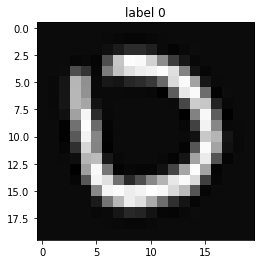

In [26]:
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Méthode 4: RNC
Réseaux de Neurones Convolutifs

In [27]:
# reshape dataset to have a single channel
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.7)

Xt_rnc = Xt.reshape((Xt.shape[0], 20, 20, 1))
Xtt_rnc = Xtt.reshape((Xtt.shape[0], 20, 20, 1))

In [28]:
# Recoder le valeurs
Yt_rnc = to_categorical(Yt)
Ytt_rnc = to_categorical(Ytt)

Xt_rncN = Xt_rnc.astype('float32')
Xtt_rncN = Xtt_rnc.astype('float32')

# normaliser
Xt_rncN = Xt_rncN / 255.0
Xtt_rncN = Xtt_rncN / 255.0

# definir le modèle RNC
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(20, 20, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compiler le modèle
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# evaluaer le modèle
_,acc = model.evaluate(Xtt_rncN, Ytt_rnc, verbose=0)


# Appliquer les métriques implementées pour voir le résultat

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 4 Mars 2022 à 22h

La partie RNC peut être laissée pour le prochain TP

In [29]:
# bonne chance